In [1]:
import numpy as np
import matplotlib.pyplot as plt

## 6.1.21, 6.2.4, 6.6.11, 6.8.2

# ======================= 6.1.21 =======================

In [63]:
x = np.array([0, 0.25, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2, 2.25, 2.5, 2.75, 3])
y = np.array([-2.815, -2.18, -0.225, 1.722, 3.492, 3.31, 2.945, 1.449, 0.334, -1.906, -3.430, -2.983, 0.087])

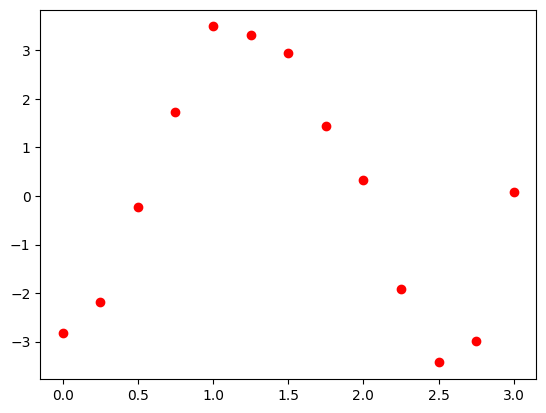

In [5]:
plt.plot(x, y, 'ro')

In [11]:
def lsm(x: np.array, y: np.array, higher_degree=1):
    m = higher_degree + 1

    b = np.empty(m)  # b
    gramm = np.empty((m, m))  # Г

    # b = (P^T)*y
    for j in range(m):
        b[j] = np.sum(y * x ** j)

    # Г = (P^T)*P
    for j in range(m):
        for k in range(m):
            gramm[j][k] = sum(x ** (k + j))

    best_coefficients = np.linalg.solve(gramm, b)

    def approximation(point_x):
        point_y = 0
        for i in range(m):
            point_y += best_coefficients[i] * point_x ** i
        return point_y

    return approximation, best_coefficients

In [8]:
rmse_array = []
functions = []
coefficients = []
for m in range(len(x)):
    function, coefficient = lsm(x, y, m)
    rmse = np.sqrt((1 / (len(x) - m)) * np.sum((function(x) - y) ** 2))
    rmse_array.append(rmse)
    functions.append(function)
    coefficients.append(coefficient)

<BarContainer object of 13 artists>

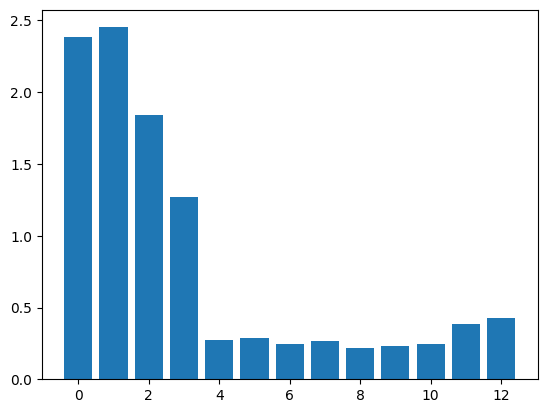

In [9]:
plt.bar(x=np.arange(len(rmse_array)), height=rmse_array)


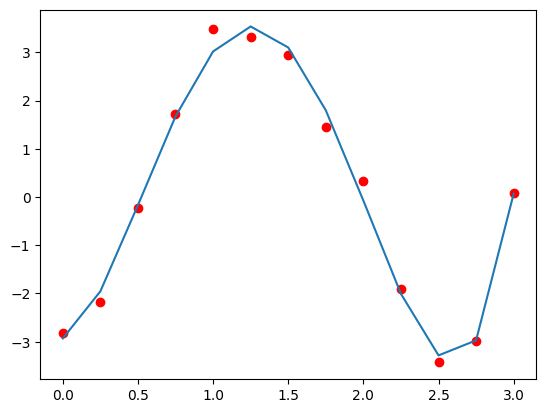

In [17]:
function, _ = lsm(x, y, 4)

plt.scatter(x, y, c='r')
plt.plot(x, function(x))

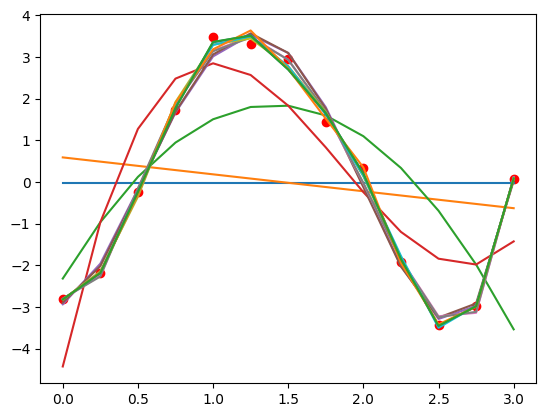

In [65]:
for f in functions:
    plt.plot(x, f(x))
plt.scatter(x, y, c='r')# ======================= 6.1.21 =======================


# ======================= 6.2.4 =======================

In [66]:
t = [0, 0.6, 1.2, 1.8, 2.4, 3, 4.2, 4.8, 5.4, 6]
x = [6.449, 19.97, 33.91, 48.2, 64.15, 76.9, 106.2, 122.2, 135.6, 149]

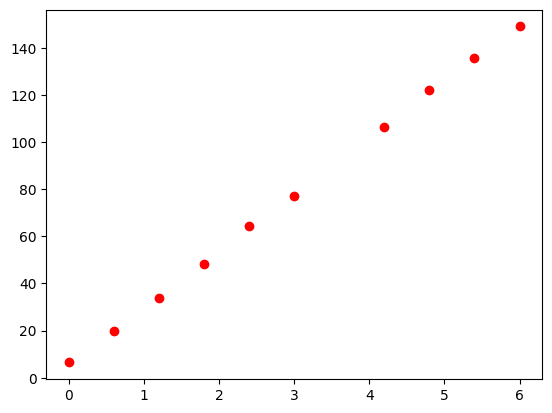

In [67]:
plt.scatter(t, x, c='r')

In [68]:
approximation, best_coefficients = lsm(np.array(t),x,1)
print(best_coefficients)

[ 5.69371993 24.00142179]


In [69]:
t.append(t[-1]*2)
x.append(approximation(t[-1]))

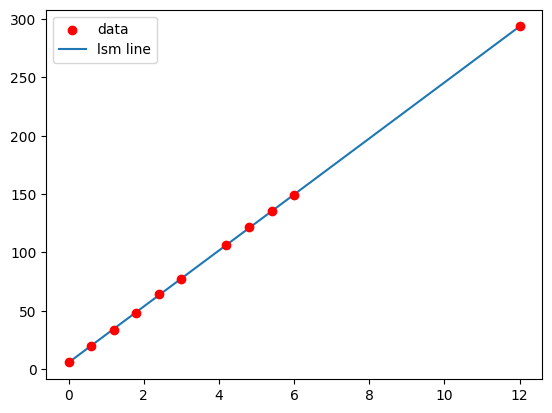

In [70]:
plt.scatter(t, x, c='r', label='data', zorder=10)
plt.plot(t, approximation(np.array(t)), label='lsm line')
plt.legend()

# ======================= 6.6.11 =======================


In [93]:
def f(x):
    return x*x*np.cos(x)

In [95]:
def lagrange_interpolating_polynomial(nodes, x):
    n = len(nodes)
    L = np.zeros_like(x)
    for i in range(n):
        term = np.ones_like(x)
        for j in range(n):
            if i != j:
                term *= (x - nodes[j]) / (nodes[i] - nodes[j])
        L += f(nodes[i]) * term
    return L

In [96]:

a, b = np.pi, np.pi/2
nodes_1 = np.linspace(a, b, 2)
nodes_2 = np.linspace(a, b, 3)
nodes_3 = np.linspace(a, b, 4)

x_vals = np.linspace(a, b, 500)
y_1 = lagrange_interpolating_polynomial(nodes_1, x_vals)
y_2 = lagrange_interpolating_polynomial(nodes_2, x_vals)
y_3 = lagrange_interpolating_polynomial(nodes_3, x_vals)



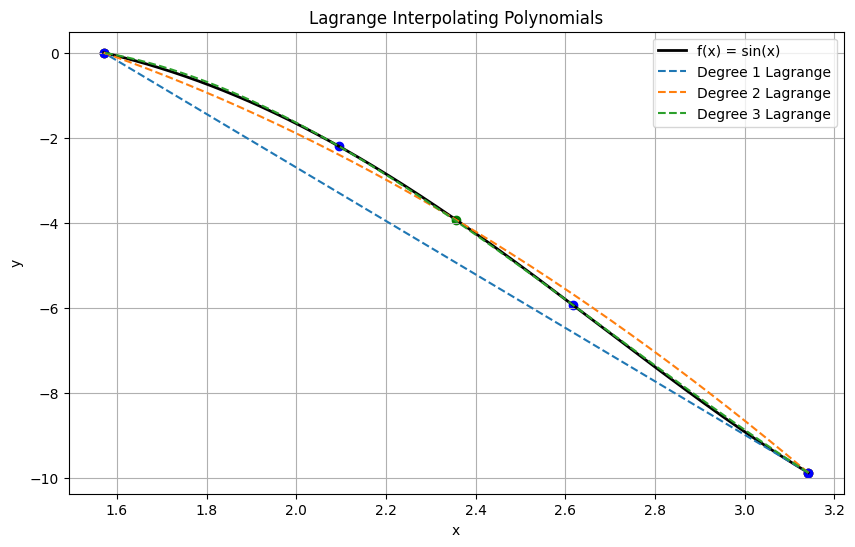

In [97]:
# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(x_vals, f(x_vals), label='f(x) = sin(x)', color='black', linewidth=2)
plt.plot(x_vals, y_1, label='Degree 1 Lagrange', linestyle='--')
plt.plot(x_vals, y_2, label='Degree 2 Lagrange', linestyle='--')
plt.plot(x_vals, y_3, label='Degree 3 Lagrange', linestyle='--')
plt.scatter(nodes_1, f(nodes_1), color='red')
plt.scatter(nodes_2, f(nodes_2), color='green')
plt.scatter(nodes_3, f(nodes_3), color='blue')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Lagrange Interpolating Polynomials')
plt.grid(True)
plt.show()


In [103]:
nodes_3_1 = [np.pi/2, 2.3, np.pi]
nodes_3_2 = [np.pi/2, np.pi/2+0.25,np.pi/2+0.5]
nodes_3_3 = [np.pi-0.5, np.pi-0.25,np.pi]

y_3_1 = lagrange_interpolating_polynomial(nodes_3_1, x_vals)
y_3_2 = lagrange_interpolating_polynomial(nodes_3_2, x_vals)
y_3_3 = lagrange_interpolating_polynomial(nodes_3_3, x_vals)

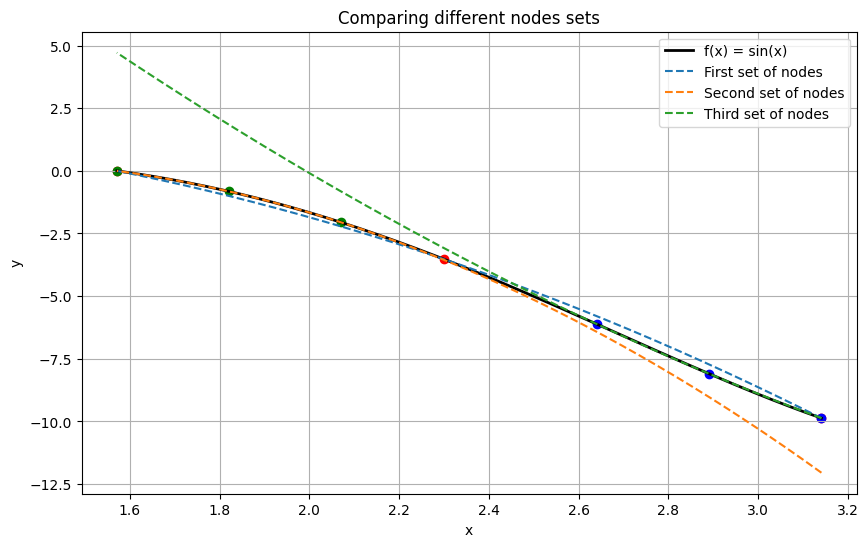

In [106]:
plt.figure(figsize=(10, 6))
plt.plot(x_vals, f(x_vals), label='f(x) = sin(x)', color='black', linewidth=2)
plt.plot(x_vals, y_3_1, label='First set of nodes', linestyle='--')
plt.plot(x_vals, y_3_2, label='Second set of nodes', linestyle='--')
plt.plot(x_vals, y_3_3, label='Third set of nodes', linestyle='--')
plt.scatter(nodes_3_1, f(np.array(nodes_3_1)), color='red')
plt.scatter(nodes_3_2, f(np.array(nodes_3_2)), color='green')
plt.scatter(nodes_3_3, f(np.array(nodes_3_3)), color='blue')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Comparing different nodes sets')
plt.grid(True)
plt.show()

# ======================= 6.8.2 =======================
